## Assignment 3.1 *(7 points)* : Logistic Regression - Heart Disease dataset {-}

This assignment aims at familiarizing you with the use of Logistic Regression model supported by scikit-learn. You will have to do:

3.1.1.  **(3 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    3.1.1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  
    3.1.1.2 *(0.5 point)* Preprocess the data to prepare for modeling.  
    3.1.1.3 *(0.5 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    3.1.1.4 *(0.5 point)* Train a Logistic Regression model on the training set.    
    3.1.1.5 *(0.5 point)* Evaluate the model performance on the test set using the following metrics: precision, recall, f1 score, and print out the confusion matrix.  

3.1.2.  **(4 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    3.1.2.1 *(1 point)* Is there a relationship between age and the likelihood of heart disease in this dataset? Can you explore this for different age groups?  
    3.1.2.2 *(1 point)* How do vital signs like blood pressure and cholesterol levels compare between patients with and without heart disease?  
    3.1.2.3 *(1 point)* Does having high fasting blood sugar appear to be a risk factor for heart disease according to this dataset?
    3.1.2.4 *(1 point)* Considering all the features, what features do you think might be the most important in predicting heart disease based on this dataset?  

The dataset you will be working on is 'heart-disease.csv'. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, etc. This dataset is to predict, based on the given attributes of a patient, whether that particular person has a heart disease or not.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment3 (e.g., DataViz-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you split the data for training and testing purpose, then build a classification model, evaluate its performance and reasonably answer the open discussion questions.

Note that the evaluation will not consider the model accuracy as the highest priority, but how properly you handle the data and use scikit-learn to build the classifier.

### Deadline {-}
Please visit Canvas for details.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv('heart-disease.csv')

In [60]:
# Check the total number of missing values in each column
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [61]:
# Check data types and the number of non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB
None


In [62]:
# Descriptive statistics of numerical columns
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std      0.526669   23.9213

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

# Solution

## 3.1.1. Coding tasks

### EDA

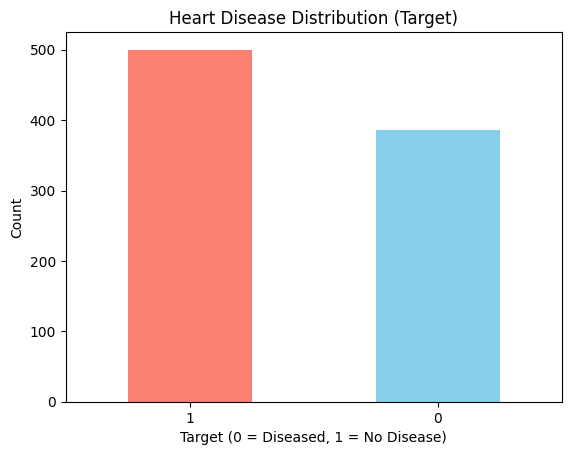

In [64]:
# Distribution of the target variable (0 = heart disease, 1 = no heart disease)
df['target'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Heart Disease Distribution (Target)')
plt.xlabel('Target (0 = Diseased, 1 = No Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Observations from the Heart Disease Distribution Chart:
- The bar chart shows the distribution of the target variable in the dataset with:
   + `Target = 1` represents individuals without heart disease.
   + `Target = 0` represents individuals with heart disease.
- There are approximately 500 samples without heart disease and around 380 with heart disease.
- The dataset is fairly balanced, meaning that the number of positive and negative cases is not heavily skewed.
- A balanced dataset helps the logistic regression model avoid bias toward one class.
- Therefore, we do not need any resampling techniques like oversampling or undersampling at this point.


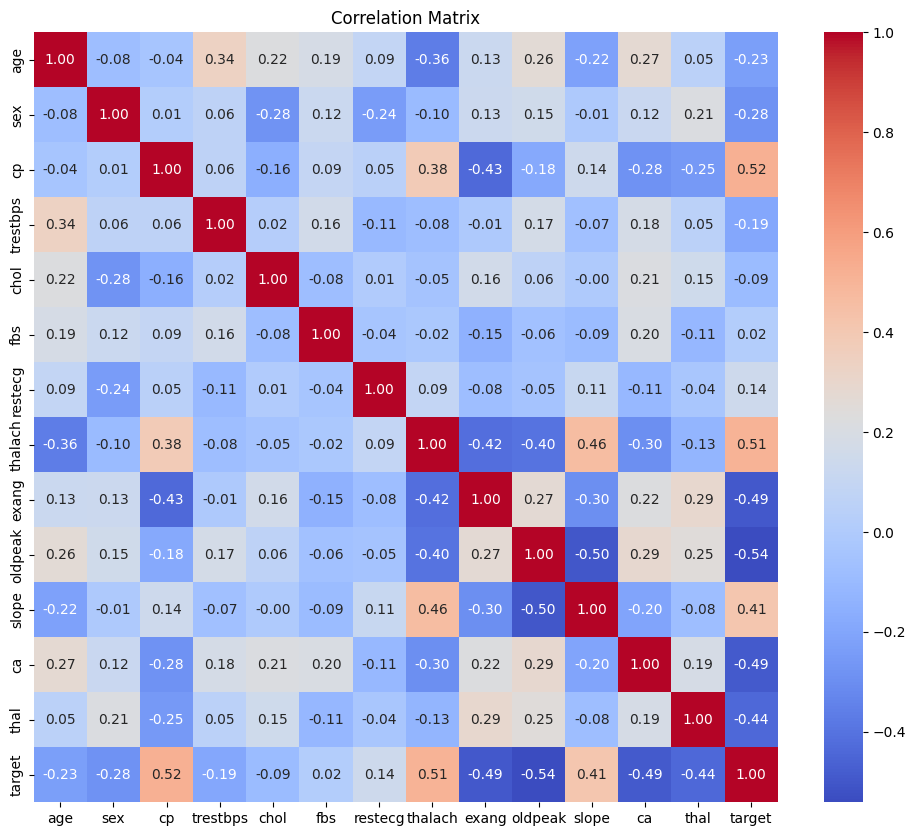

In [65]:
# Correlation between variables
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- The heatmap above illustrates the **correlation coefficients** between all numerical features in the datase:
  - **Chest pain type (`cp`)** shows a moderate positive correlation with 0.52, suggesting that some types of chest pain are more common among individuals without heart disease.
  - **Maximum heart rate achieved (`thalach`)** is positively correlated with 0.51, indicating that higher heart rates are generally found in healthy individuals.
  - **Exercise-induced angina (`exang`)** has a negative correlation of −0.49, meaning those who experience angina during exercise are more likely to have heart disease.
  - **Oldpeak (ST depression)** shows the strongest negative correlation with −0.54, making it a significant indicator of heart disease.
  - **Number of major vessels (`ca`)** and **Thalassemia (`thal`)** are also negatively correlated −0.49 and −0.44 respectively, indicating that abnormalities in these areas may be associated with a higher risk.

- In summary, features like `cp`, `thalach`, `exang`, `oldpeak`, `ca`, and `thal` show strong relationships with heart disease and may play important roles in model training.


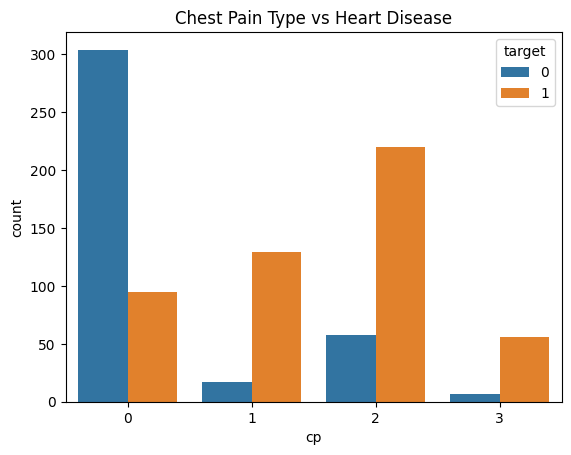

In [66]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

- The bar chart shows the distribution of chest pain types (`cp`) in relation to heart disease status (`target`).
- `cp` values represent:
  - 0 = asymptomatic
  - 1 = atypical angina
  - 2 = non-anginal pain
  - 3 = typical angina

- People with **cp = 0 (asymptomatic)** are mostly associated with `target = 0`, indicating a higher likelihood of heart disease.
- People with **cp = 1, 2, or 3** are mostly associated with `target = 1`, suggesting they are less likely to have heart disease.
- Especially, **cp = 2** (non-anginal pain) has the highest count of people without heart disease.
- This implies that chest pain type is a strong predictor of heart disease in this dataset.


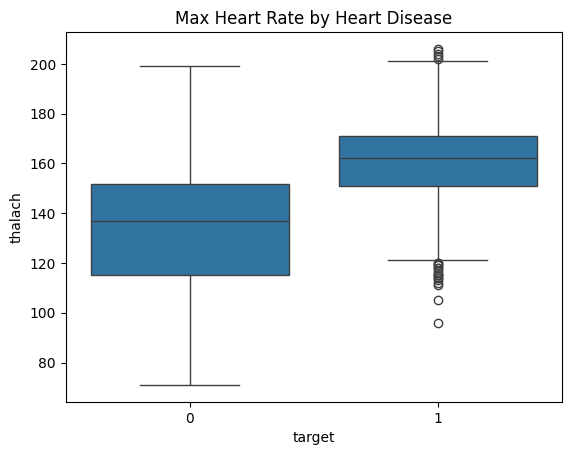

In [67]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Max Heart Rate by Heart Disease')
plt.show()

- This boxplot compares the maximum heart rate achieved (`thalach`) between individuals with and without heart disease (`target`).
- `target = 0` → patient has heart disease  
- `target = 1` → patient does not have heart disease

- People **without heart disease** (`target = 1`) tend to have higher maximum heart rates.
- The median `thalach` is significantly higher in the no-disease group (appoximate 165 bpm) compared to the disease group (appoximate 135 bpm).
- The **interquartile range (IQR)** is narrower for `target = 1`, suggesting more consistency in healthy patients.
- Several **outliers** exist in both groups, but especially low outliers appear in the healthy group.
- This indicates that a lower maximum heart rate may be associated with heart disease.

Conclusion:
- `thalach` (maximum heart rate achieved) is a useful predictor of heart disease and should be included in the model.


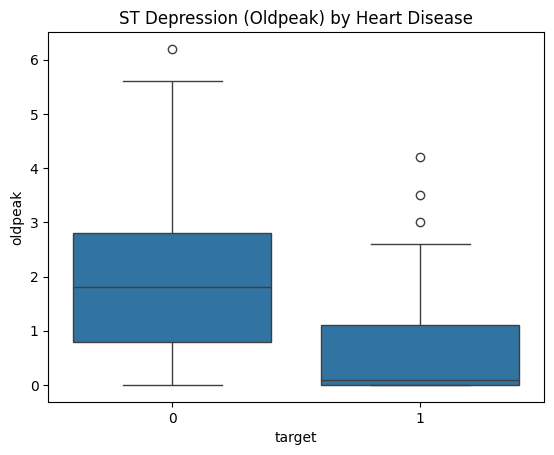

In [68]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression (Oldpeak) by Heart Disease')
plt.show()

- This boxplot visualizes the distribution of `oldpeak` (ST depression induced by exercise) between patients with (`target = 0`) and without (`target = 1`) heart disease.
Key observations:

- Patients **with heart disease** (`target = 0`) have significantly higher oldpeak values compared to those without.
- The median `oldpeak` in the disease group is around 2.0, while in the no-disease group it is close to 0.
- The **interquartile range (IQR)** is wider for those with heart disease, showing more variability.
- Some outliers exist in both groups, but high outliers are much more common in the disease group.
- This aligns with medical knowledge: higher ST depression during exercise is a strong indicator of heart problems.

Conclusion:
- `oldpeak` is a highly informative feature for predicting heart disease and should definitely be included in the logistic regression model.


### Preprocessing

Fast check:
- No missing value
- cp, restecg, slope, thal: categorical but discrete values (no need encoding)
- oldpeak: float

#### Feature Scaling/Standardization

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Data Splitting

In [70]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y)
X = df.drop("target", axis=1)
y = df["target"]

# Normalize data (scale features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data for unbiased evaluation

In [71]:
from sklearn.model_selection import train_test_split

# Divide the data with a ratio of 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Training Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluate Model

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation indexes
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Disease", "No Disease"])

# Print the results
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("\n Confusion Matrix:\n", conf_matrix)
print("\n Classification Report:\n", report)

Precision: 0.963
Recall: 0.972
F1 Score: 0.967

 Confusion Matrix:
 [[ 68   4]
 [  3 103]]

 Classification Report:
               precision    recall  f1-score   support

     Disease       0.96      0.94      0.95        72
  No Disease       0.96      0.97      0.97       106

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



Summary: The Logistic Regression model performed well on the test set with the following results:

- Precision: 0.963  
- Recall: 0.972  
- F1 Score: 0.967  
- Accuracy: 96%

Thus,
- The model is highly accurate and balances both precision and recall well.
- Confusion Matrix:
  - True Positives (No Disease): 103
  - True Negatives (Disease): 68
  - False Positives: 4
  - False Negatives: 3
- The recall score for detecting patients without heart disease is 0.97, while precision is also high, showing the model rarely misclassifies.

Conclusion:
- The model is effective at distinguishing between individuals with and without heart disease.
- No significant class imbalance issues were found, and logistic regression appears suitable for this classification task.


## 3.1.2. Open discussion questions

### Is there a relationship between age and the likelihood of heart disease in this dataset? Can you explore this for different age groups?

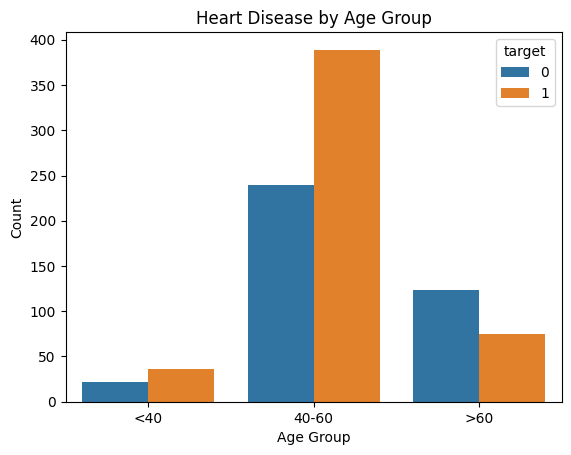

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group ages into intervals
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '>60'])

# Plot heart disease rates by age group
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

- The **40–60 age group** has the highest number of total patients, and also contains the most heart disease cases (`target = 0`).
- Individuals in the **<40 age group** show relatively fewer cases overall, and most of them do not have heart disease.
- In the **>60 group**, the number of patients with heart disease is slightly higher than those without.

Conclusion:

There is a clear relationship between age and heart disease. In particular:
- Middle-aged individuals (40–60) are the most represented and seem to have a higher risk.
- This suggests that age is a relevant factor to consider when predicting the likelihood of heart disease.


### How do vital signs like blood pressure and cholesterol levels compare between patients with and without heart disease?

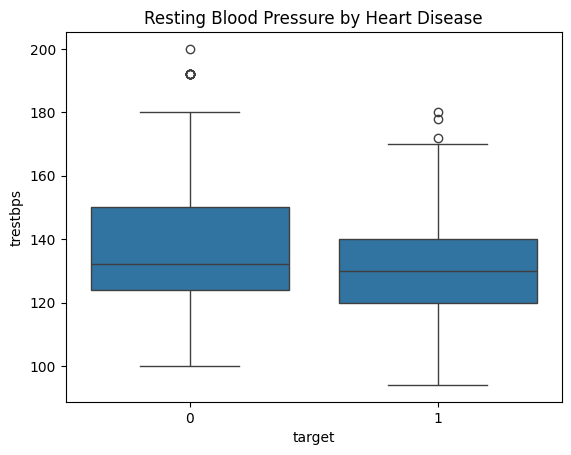

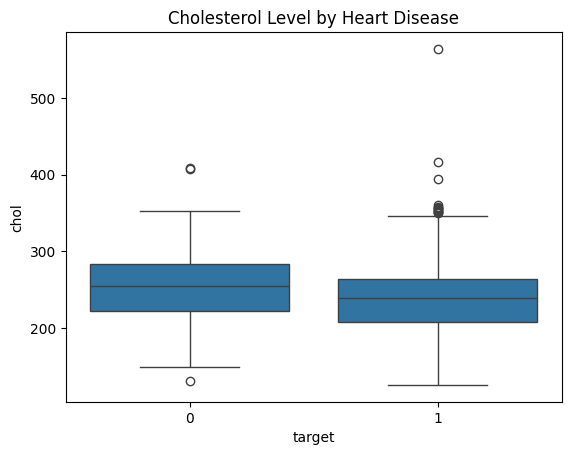

In [76]:
# Boxplot for resting blood pressure
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Heart Disease')
plt.show()

# Boxplot for cholesterol
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Level by Heart Disease')
plt.show()

We used boxplots to compare two important health indicators — resting blood pressure (`trestbps`) and cholesterol level (`chol`) — between individuals with and without heart disease.
- **Resting Blood Pressure (`trestbps`)**:
  - Patients with heart disease (`target = 0`) tend to have slightly higher blood pressure than those without.
  - However, the medians and interquartile ranges overlap significantly, suggesting this feature alone may not be a strong predictor.
- **Cholesterol Level (`chol`)**:
  - The cholesterol levels also appear to be slightly higher in patients with heart disease.
  - While the distributions are similar, there are more high-value outliers in the no-disease group.

**Conclusion:**
- Both `trestbps` and `chol` show some differences between groups but are less distinct compared to features like `oldpeak`, `thalach`, or `cp`.
- These vital signs may still contribute to model performance when combined with other features, but are not highly discriminative on their own.


###  Does having high fasting blood sugar appear to be a risk factor for heart disease according to this dataset?

Among the vital signs we analyzed (`trestbps`, `chol`, `thalach`, and `oldpeak`) (We already had had 4 boxplots for 4 features above), two features stand out clearly:

- **`thalach` (maximum heart rate achieved)**:
  - Patients without heart disease tend to have higher maximum heart rates.
  - The difference in medians is clear and consistent, with minimal overlap between groups.

- **`oldpeak` (ST depression during exercise)**:
  - Patients with heart disease have significantly higher ST depression values.
  - The boxplot shows clear separation between the groups with a high correlation to `target`.

Conclusion:
- `thalach` and `oldpeak` are the most informative vital signs in predicting heart disease in this dataset.
- These features should be prioritized in modeling and feature selection.


### Considering all the features, what features do you think might be the most important in predicting heart disease based on this dataset?

If this logistic regression model were to be implemented in a real-world healthcare setting, several additional factors and data would be important to consider:

Data Considerations:
- **More diverse and up-to-date data** from different hospitals, countries, and demographics to avoid model bias.
- **Longitudinal data** to observe changes in vital signs over time rather than relying on a single snapshot.
- **Clinical notes or history** such as previous cardiovascular events, smoking status, medications, or family history.

Practical Considerations:
- **Patient privacy and data security** (e.g., HIPAA compliance).
- **Model explainability**: doctors and patients should understand why a prediction was made.
- **Integration with hospital systems (EMR/EHR)**: the model must fit into existing workflows.
- **Validation in clinical trials**: the model needs to be evaluated in real environments before deployment.

Conclusion:

While the model shows promise on the current dataset, real-world deployment requires careful validation, ethical safeguards, and richer data sources to ensure safe and effective clinical use.


## Assignment 3.2 *(3 points)*: Logistic Regression - CIFAR 10 SMALL dataset

This example demonstrates how to build a logistic regression model to recognize objects in CIFAR 10 dataset.

In this assignment, you will have to:
- 3.2.1 (Done) Load the dataset.
- 3.2.2 *(1 point)* Preprocess and normalize the images.
- 3.2.3 *(1 point)* Construct, train, and evaluate a multinomial logistic regression model for CIFAR 10 SMALL image classification.
- 3.2.4 *(1 point)* Assess the model’s performance on the test set. Keep in mind that low accuracy is acceptable due to the complexity of the data and the limited capacity of logistic regression.

The dataset you will be working on is CIFAR 10 SMALL (https://www.openml.org/d/40926) which consists of 20,000 32x32 colour images in 10 classes, with 2,000 images per class. There are 14,000 training images and 6,000 test images. Here follows the ten object classes:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

In [82]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [83]:
# Load the CIFAR 10 SMALL dataset from openml
# OpenML is an open platform for sharing datasets, algorithms, and experiments
cifar_10_small = fetch_openml('cifar_10_small', version=1, parser='auto')

In [84]:
# Separate data into features X and labels y, then convert to numpy arrays
X = cifar_10_small['data'].to_numpy()
y = cifar_10_small['target'].to_numpy()

print("Feature shape: " + str(X.shape))
print("Label shape: " + str(y.shape))

class_names = [
    'airplane',   # Label: 0
    'automobile', # Label: 1
    'bird',       # Label: 2
    'cat',        # Label: 3
    'deer',       # Label: 4
    'dog',        # Label: 5
    'frog',       # Label: 6
    'horse',      # Label: 7
    'ship',       # Label: 8
    'truck'       # Label: 9
]

Feature shape: (20000, 3072)
Label shape: (20000,)


Label: dog


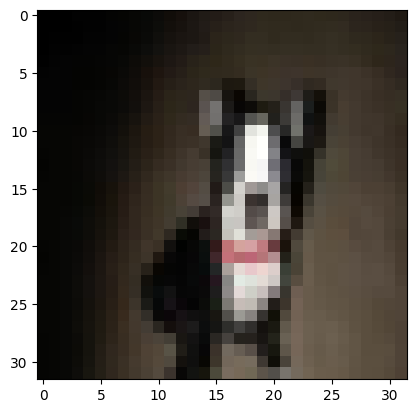

In [85]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[198])])
plt.imshow(X[198].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructuring.

Label: automobile


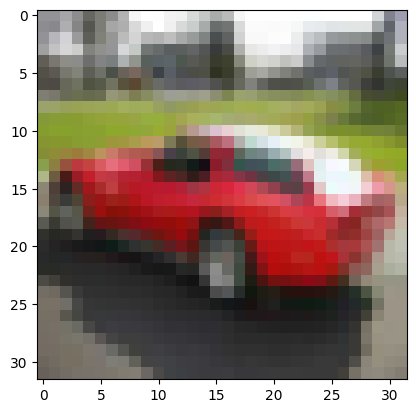

In [86]:
# Print a sample of the dataset
print("Label: " + class_names[int(y[255])])
plt.imshow(X[255].reshape(3,32,32).transpose([1,2,0])) # The nature of the data requires this restructure.

In [87]:
# Split the dataset into training and testing sets (using 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [88]:
from sklearn.preprocessing import StandardScaler

# Convert pixel values ​​from [0, 255] → [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Optionally standardize with zero-mean and unit-variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression(
    multi_class='multinomial', solver='saga',
    max_iter=100, n_jobs=-1, verbose=1
)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 215 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='saga',
                   verbose=1)

In [91]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc, 4))

# Optional: display additional classification report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Test Accuracy: 0.3613

 Classification Report:

              precision    recall  f1-score   support

    airplane       0.43      0.48      0.45       572
  automobile       0.42      0.38      0.40       580
        bird       0.25      0.23      0.24       606
         cat       0.23      0.22      0.23       621
        deer       0.31      0.29      0.30       638
         dog       0.28      0.31      0.29       534
        frog       0.39      0.39      0.39       627
       horse       0.41      0.41      0.41       614
        ship       0.43      0.48      0.46       598
       truck       0.46      0.42      0.44       610

    accuracy                           0.36      6000
   macro avg       0.36      0.36      0.36      6000
weighted avg       0.36      0.36      0.36      6000



The multinomial logistic regression model was evaluated on the CIFAR-10 SMALL test set with the following results:

- **Test Accuracy:** 36.13%
- **Macro-Averaged Precision / Recall / F1-Score:** ~36%

Class-Level Performance:
- Classes like **airplane**, **ship**, and **truck** achieved relatively better F1-scores (~0.44–0.46), showing the model could somewhat distinguish these classes.
- On the other hand, classes like **cat**, **bird**, and **deer** had lower F1-scores (~0.23–0.31), likely due to higher visual similarity or noise in features.

Explanation:
- The overall performance is expected to be low due to:
  - High dimensionality of image data (3072 features per sample)
  - Logistic regression is a linear model with limited capacity
  - Lack of feature extraction like CNN filters

Conclusion:
Despite its simplicity, the logistic regression model achieves reasonable baseline performance on a challenging image classification task.
This highlights the importance of using more advanced models (e.g., CNNs) for visual recognition problems.
